# 2023 유튜버 채널 분석

In [1]:
## Data ## 
import pandas as pd
import numpy as np

## Image Request ## 
import requests
from io import BytesIO

## Visualization ## 
import missingno as msno
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt  
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
color_scheme = px.colors.sequential.Reds

In [3]:
df = pd.read_csv("youtube.csv", encoding="ISO-8859-1")
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


결측치 분석 시각화

<Axes: >

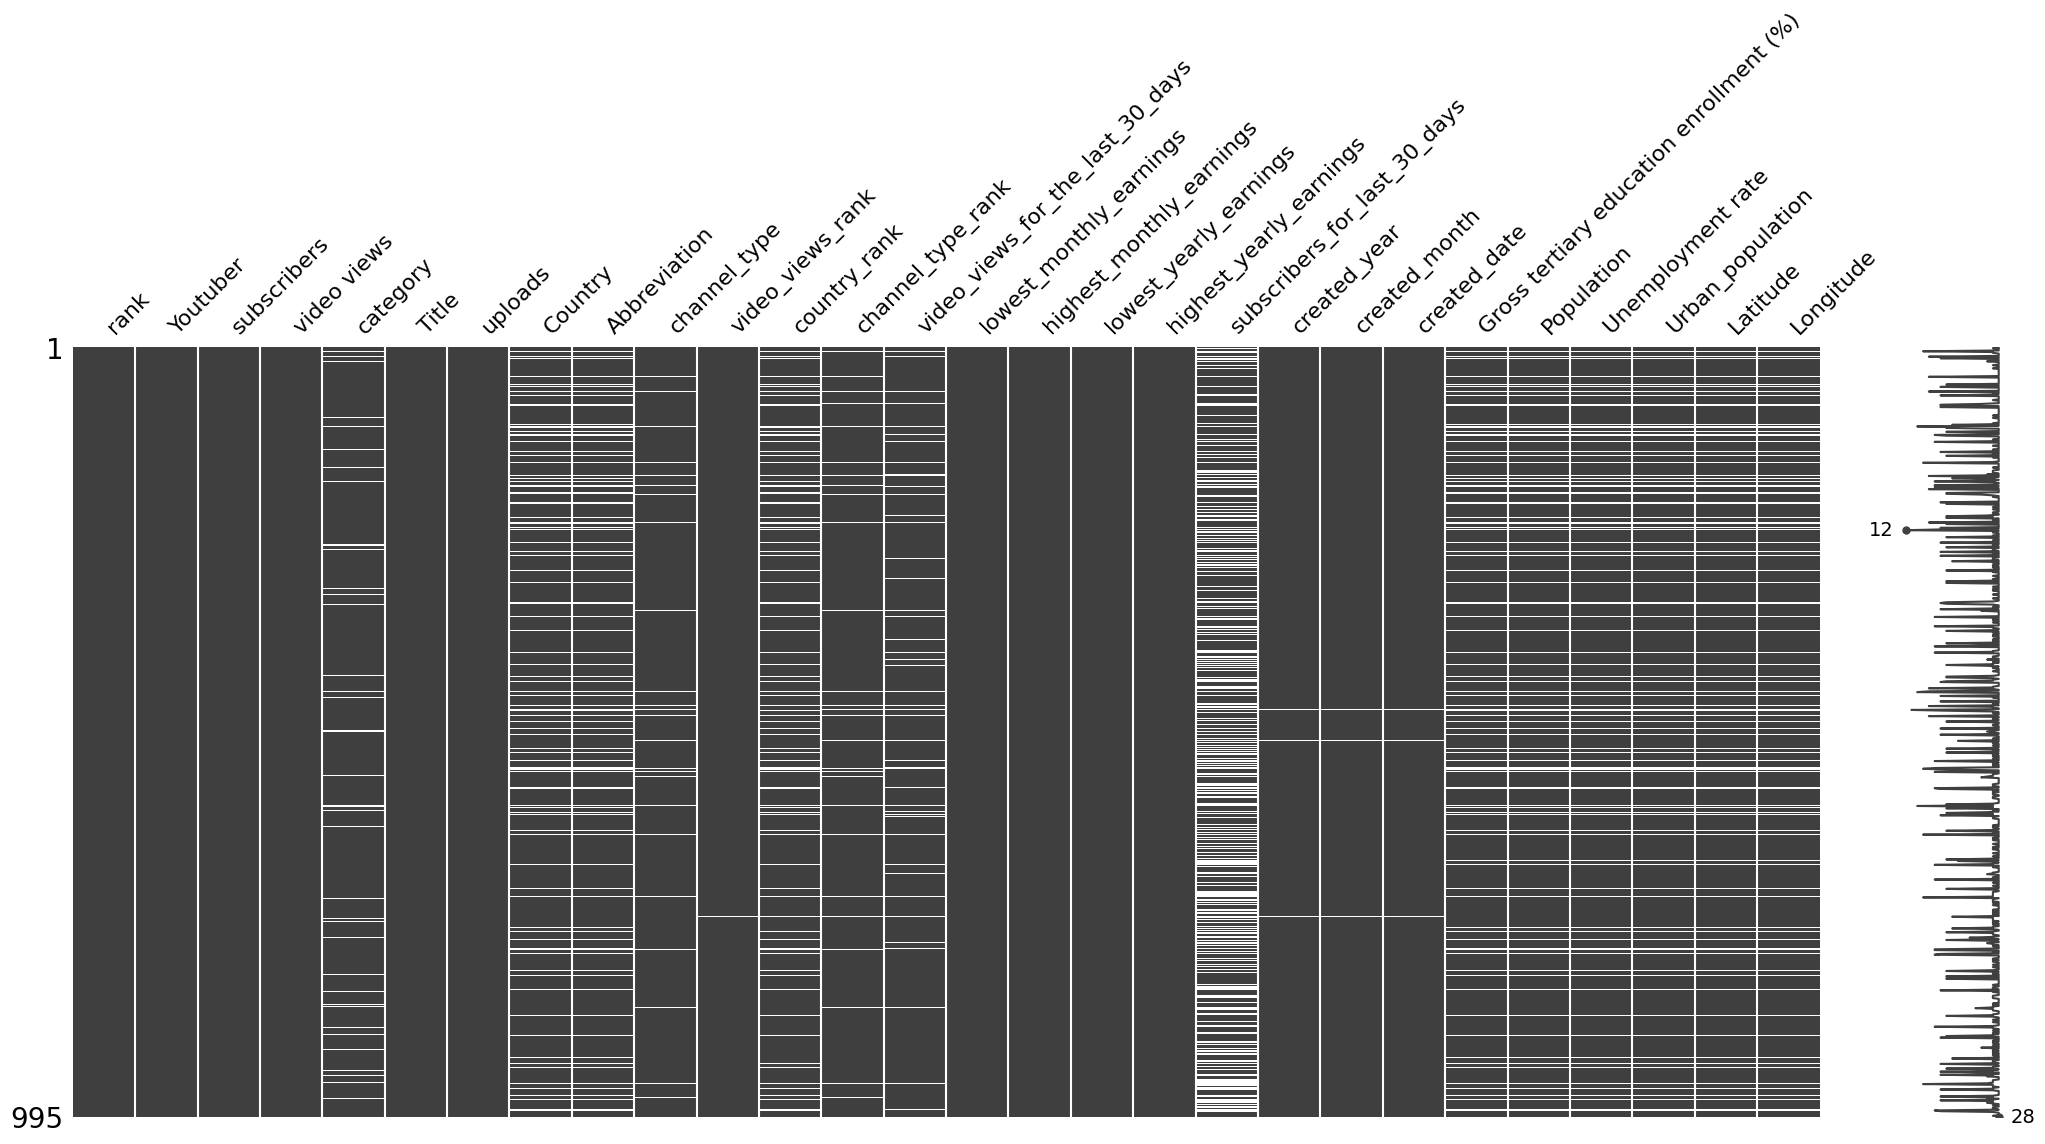

In [6]:
msno.matrix(df)

In [7]:
sorted(df['created_year'].unique())

[1970.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 nan,
 2022.0]

결측치를 모두 삭제한다.</br>
또 유튜브가 2005년에 만들어졌으므로 created가 1970년인 데이터는 삭제한다.

In [8]:
df = df.dropna()
df.drop(df.loc[df['created_year'] == 1970].index, inplace=True)

## 유튜브 채널 생성 년도 분포

In [9]:
year_counts = df['created_year'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=year_counts.index,
    y=year_counts.values,
    fill='tozeroy',
    line_color='darkred',
    mode='lines+markers'
  )
)

fig.update_layout(
    title_text='YouTube Channels Created Year',
    template='plotly_white',
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Channels',
        titlefont_size=16
    ),
)



유튜버가 가장 많이 탄생한 년도는 2014년이다.

## 제일 구독자 수가 많은 100개의 채널명

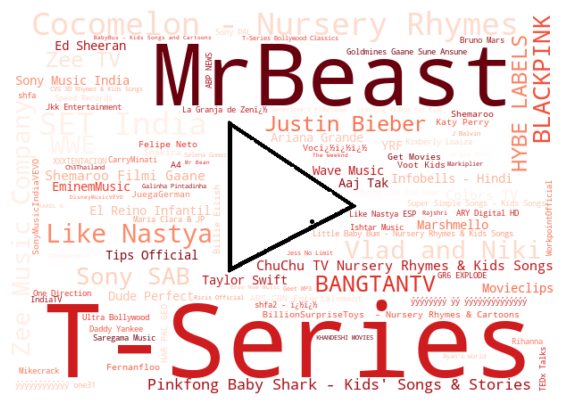

In [10]:
youtubers_data = dict(zip(df['Youtuber'].tolist(), df['subscribers'].tolist()))
youtube_icon = requests.get('https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/952/cached.offlinehbpl.hbpl.co.uk/news/ORP/YouTube-icon-full_color-20150527090518393.png')
mask_image = np.array(Image.open(BytesIO(youtube_icon.content)))

wc = WordCloud(width=800,
               height=500,
               max_words=100,
               mask=mask_image,
               colormap='Reds_r',
               contour_color='black',
               contour_width=3,
               background_color='white').generate_from_frequencies(youtubers_data)

plt.figure(figsize=(30,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis(False)
plt.show()


## 한국 버전

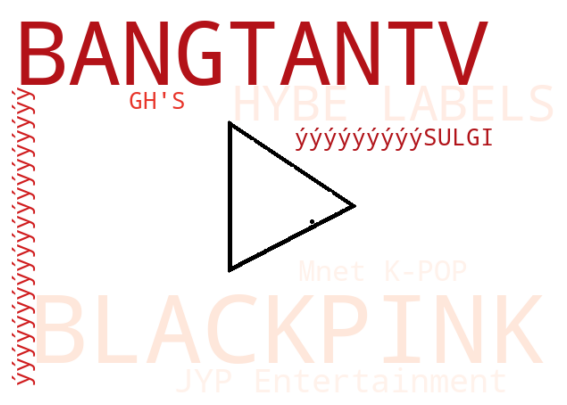

In [11]:
df_korea = df.loc[df['Country'] == 'South Korea']
youtubers_data = dict(zip(df_korea['Youtuber'].tolist(), df_korea['subscribers'].tolist()))
youtube_icon = requests.get('https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/952/cached.offlinehbpl.hbpl.co.uk/news/ORP/YouTube-icon-full_color-20150527090518393.png')
mask_image = np.array(Image.open(BytesIO(youtube_icon.content)))

wc = WordCloud(width=800,
               height=500,
               max_words=100,
               mask=mask_image,
               colormap='Reds_r',
               contour_color='black',
               contour_width=3,
               background_color='white').generate_from_frequencies(youtubers_data)

plt.figure(figsize=(30,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis(False)
plt.show()

## top 10 유튜버 원차트

In [12]:
top_10_most_subscribed_channels = df[:10]
fig = px.sunburst(
  top_10_most_subscribed_channels,
  path=['Youtuber', 'Country'],
  values='subscribers',
  color='subscribers',
  color_continuous_scale='Reds'
)
fig.update_layout(
  title_text='Top 10 Most Subscribed YouTubers',
  uniformtext=dict(minsize=8, mode='hide')
)

fig.show()

## Video Views와 Subscribers의 관계

In [13]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
df[['video views','subscribers']].corr()

,video views,subscribers
video views,1.000000,0.851949
subscribers,0.851949,1.000000


In [15]:
fig = make_subplots(rows=1,cols=3)
fig.update_layout(title_text='Boxplot of Video Views & Video Uploads & Subscribers',
                  uniformtext_minsize=12,
                  uniformtext_mode='hide')
fig.add_trace(go.Box(y=df['video views'],
                     name='Video Views',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[3]),row=1,col=1)
fig.add_trace(go.Box(y=df['uploads'],
                     name='Video Uploads',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[4]),row=1,col=2)
fig.add_trace(go.Box(y=df['subscribers'],
                     name='Subscribers',
                     boxpoints='outliers',
                     marker_color=color_scheme[6],
                     line_color=color_scheme[5]),row=1,col=3)

## 채널 카테고리

In [16]:
categories = df.dropna()['category'].value_counts().sort_values()
fig = px.pie(values=categories.values,
             names=categories.index,
             color_discrete_sequence=color_scheme)
fig.update_traces(textposition='inside',
                  textfont_size=10,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=10, 
                  uniformtext_mode='hide',
                  template ='plotly_white')

fig.show()

## Geographical Distribution

In [17]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [18]:
category_subscribers = df[['category','subscribers']].groupby(by='category').sum().sort_values(by='subscribers').reset_index()
category_subscribers

,category,subscribers
0,Autos & Vehicles,35700000
1,Movies,51300000
2,Nonprofits & Activism,55500000
3,Pets & Animals,58200000
4,Trailers,78000000
5,Science & Technology,207100000
6,Howto & Style,215000000
7,Sports,263400000
8,News & Politics,411900000
9,Shows,522100000


In [19]:
fig = px.bar(category_subscribers,x="category",y="subscribers",title='Top 100 채널 중 카테고리별 구독자 합')
fig

In [20]:
px.data.iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [21]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Video Views, Uploads, Subscribers vs Yearly Earnings

In [22]:
df['average_yearly_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) / 2
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

[<Axes: > <Axes: > <Axes: >]


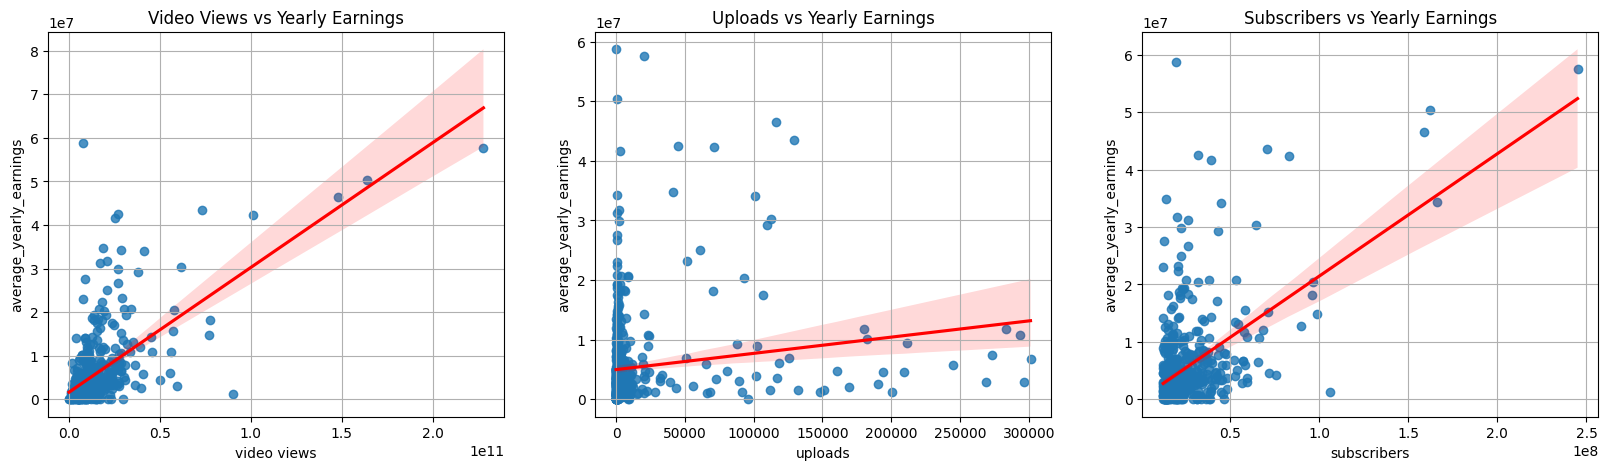

In [23]:
fig,axs = plt.subplots(1,3,figsize=(20,5))
print(axs)

sns.regplot(ax=axs[0],data=df,x='video views', y='average_yearly_earnings',line_kws={'color': 'red'})
sns.regplot(ax=axs[1],data=df,x='uploads', y='average_yearly_earnings',line_kws={'color': 'red'})
sns.regplot(ax=axs[2],data=df,x='subscribers', y='average_yearly_earnings',line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Video Views vs Yearly Earnings')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')
axs[2].grid(True)
axs[2].set_title('Subscribers vs Yearly Earnings')
plt.show()

In [24]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'average_yearly_earnings', 'average_monthly_earnings'],
      dtype='object')

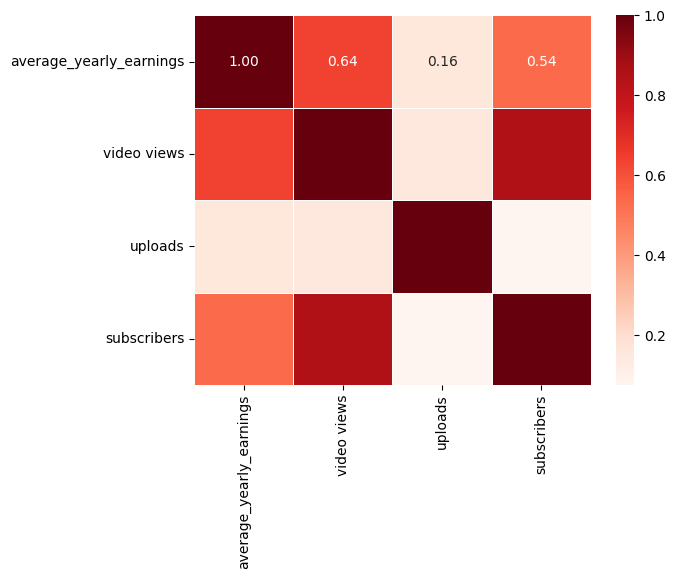

In [25]:
corr = df[['average_yearly_earnings', 'video views', 'uploads', 'subscribers']].corr()
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='Reds',fmt='.2f')
plt.show()


In [26]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'average_yearly_earnings', 'average_monthly_earnings'],
      dtype='object')

## 카테고리와 연 수입

In [27]:
category_yearlyEarning = df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=False)

fig = go.Figure(data=px.bar(
  x=category_yearlyEarning.index,
  y=category_yearlyEarning.values,
  color=category_yearlyEarning.index,
  color_discrete_sequence=color_scheme[::-1],
  title='Average Yearly Earnings by Category',
  template='plotly_white',
  text=np.round(category_yearlyEarning.values/1000000,2),
  height=700
))
fig.update_layout(
    xaxis=dict(
        title='Category',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Yearly Earnings',
        titlefont_size=16
    ),
)
fig

In [28]:
color_scheme

['rgb(255,245,240)',
 'rgb(254,224,210)',
 'rgb(252,187,161)',
 'rgb(252,146,114)',
 'rgb(251,106,74)',
 'rgb(239,59,44)',
 'rgb(203,24,29)',
 'rgb(165,15,21)',
 'rgb(103,0,13)']